# Variations on the number of judges

Vary judges number from 1 to $m$ and compute stability

Others TODOs:

- Area under the curves
- Generalization scores

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import sys
sys.path.append('../../ranky')
import ranky as rk
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', (0.2, 0.2, 0.4), '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) # '#252545'

In [16]:
def experiment(m, verbose=True, size_limit=50000, trials=50, num_div=None, method='Mean'):
    if m.shape[1] > size_limit:
        return [0], [0]
    last = m.shape[1]
    if num_div is None:
        div = 1
    else:
        div = int(last / num_div)
    x = range(1, last, div)
    stabilities = []
    for i in (tqdm(x) if verbose else x):
        scores = []
        for _ in range(trials):
            _m = rk.bootstrap(m, axis=1, n=i)
            if method == 'Mean':
                r = rk.score(_m)
            elif method == 'Median':
                r = rk.majority(_m)
            elif method == 'Average rank':
                r = rk.borda(_m, reverse=True)
            elif method == 'Success rate':
                r = rk.pairwise(_m, wins=rk.success_rate)
            elif method == "Copeland's method":
                r = rk.pairwise(_m)
            elif method == 'Relative difference':
                r = rk.pairwise(_m, wins=rk.relative_difference)
            scores.append(r)
        scores = np.array(scores)
        stabilities.append(rk.kendall_w(scores))
    return x, stabilities
    
def plot_stability(x, stabilities, title=None, xlabel='Number of test samples'):
    # plot results
    plt.plot(x, stabilities)
    plt.xlabel(xlabel)
    plt.ylabel('Stability')
    if title is not None:
        plt.title(title)
    plt.show()
    
def plot_stabilities(tuple_list, log_transform=False, title=None, xlabel='Number of test samples', labels=None):
    fig, ax = plt.subplots()
    i = 0
    for x, stabilities in tuple_list:
        label = labels[i] if labels is not None else None
        i += 1
        if log_transform:
            plt.semilogx(x, stabilities, alpha=0.8, label=label)
        else:
            plt.plot(x, stabilities, alpha=0.8, label=label)
    plt.xlabel(xlabel)
    plt.ylabel('Stability')
    ax.set_facecolor('#EAEAF2')  
    ax.grid(True, color='white')
    ax.set_axisbelow(True)
    if title is not None:
        plt.title(title)
    if labels is not None:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [4]:
folder = '../data/'

# load from CSV files
def load_da(name):
    return pd.read_csv(os.path.join(folder, name+'.data'), sep=' ', header=None).T

da_names = ['AutoDL-AUC', 'AutoDL-ALC', 'AutoML', 'Artificial', 'OpenML', 'Statlog']
da_matrices = [load_da(name) for name in da_names]

In [3]:
methods = ['Mean', 'Median', 'Average rank', 'Success rate', "Copeland's method", 'Relative difference']

AutoDL-AUC


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:54<00:00, 49.11s/it]


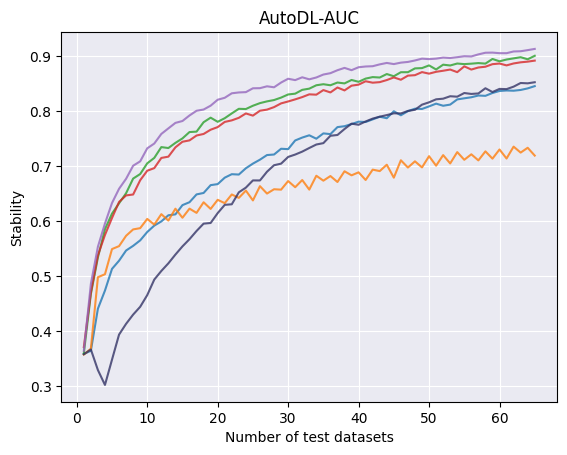

AutoDL-ALC


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:51<00:00, 48.64s/it]


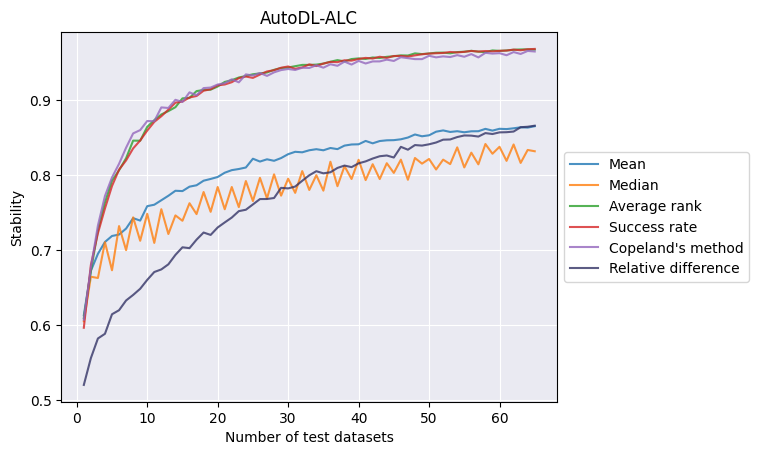

AutoML


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:53<00:00, 28.98s/it]


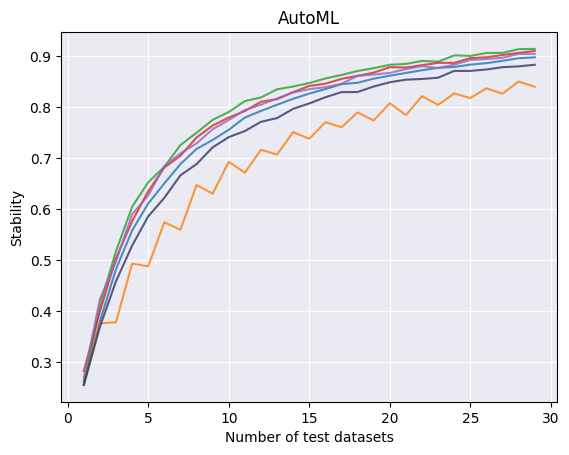

Artificial


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:43<00:00, 67.33s/it]


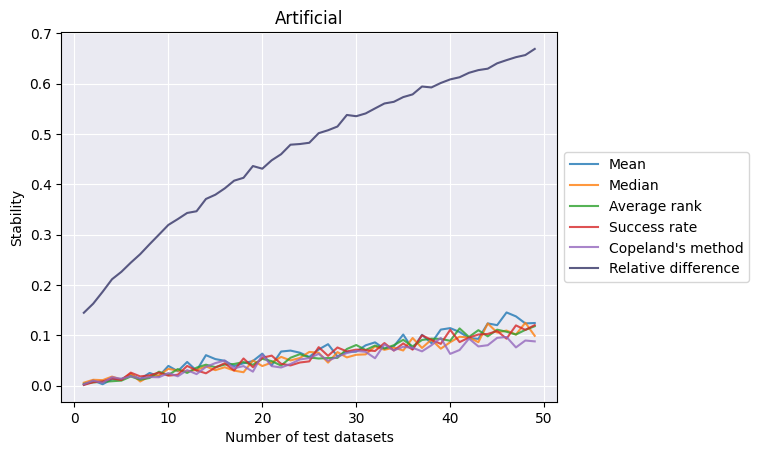

OpenML


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [2:11:17<00:00, 1312.84s/it]


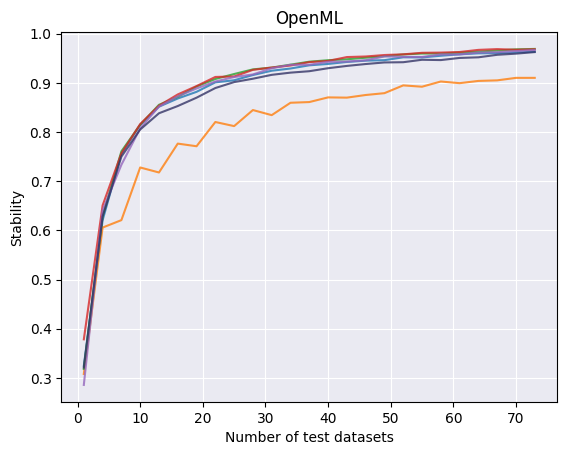

Statlog


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:47<00:00,  7.89s/it]


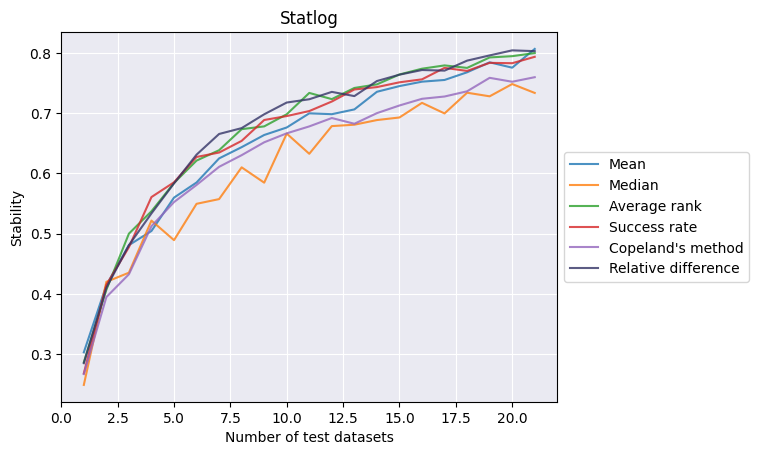

In [23]:
trials = [1000, 1000, 1000, 1000, 200, 200]
num_divs = [None, None, None, None, 20, 20]
for num in range(len(da_names)):
    name = da_names[num]
    print(name)
    m = da_matrices[num]
    tl = []
    for method in tqdm(methods):
        tl.append(experiment(m, trials=trials[num], method=method, num_div=num_divs[num], verbose=False))
    labels = methods if num%2!=0 else None
    plot_stabilities(tl, xlabel='Number of test datasets', title=da_names[num], labels=labels)